In [6]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import cross_val_score

import sys
sys.path.append("../scripts/")

from ml_pipeline import run_train_pipeline, get_pipeline,dvc_get_data

In [7]:
# df = dvc_get_data('data/data.csv')
df = pd.read_csv('../data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
x = df.drop(columns=['Unnamed: 32','id','diagnosis'])
y = df['diagnosis']
y = y.map({'M': 1, 'B': 0}).astype(int)
y = y.values

In [9]:
model = xgb.XGBClassifier()
str(model)

'XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,\n              colsample_bynode=None, colsample_bytree=None,\n              enable_categorical=False, gamma=None, gpu_id=None,\n              importance_type=None, interaction_constraints=None,\n              learning_rate=None, max_delta_step=None, max_depth=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_estimators=100, n_jobs=None, num_parallel_tree=None,\n              predictor=None, random_state=None, reg_alpha=None,\n              reg_lambda=None, scale_pos_weight=None, subsample=None,\n              tree_method=None, validate_parameters=None, verbosity=None)'

2022-07-01 13:37:15,029:logger:successfully got catagorical columns
2022-07-01 13:37:15,035:logger:successfully got catagorical columns
2022-07-01 13:37:15,040:logger:successfully got numerical columns
/home/etta/miniconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:37:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


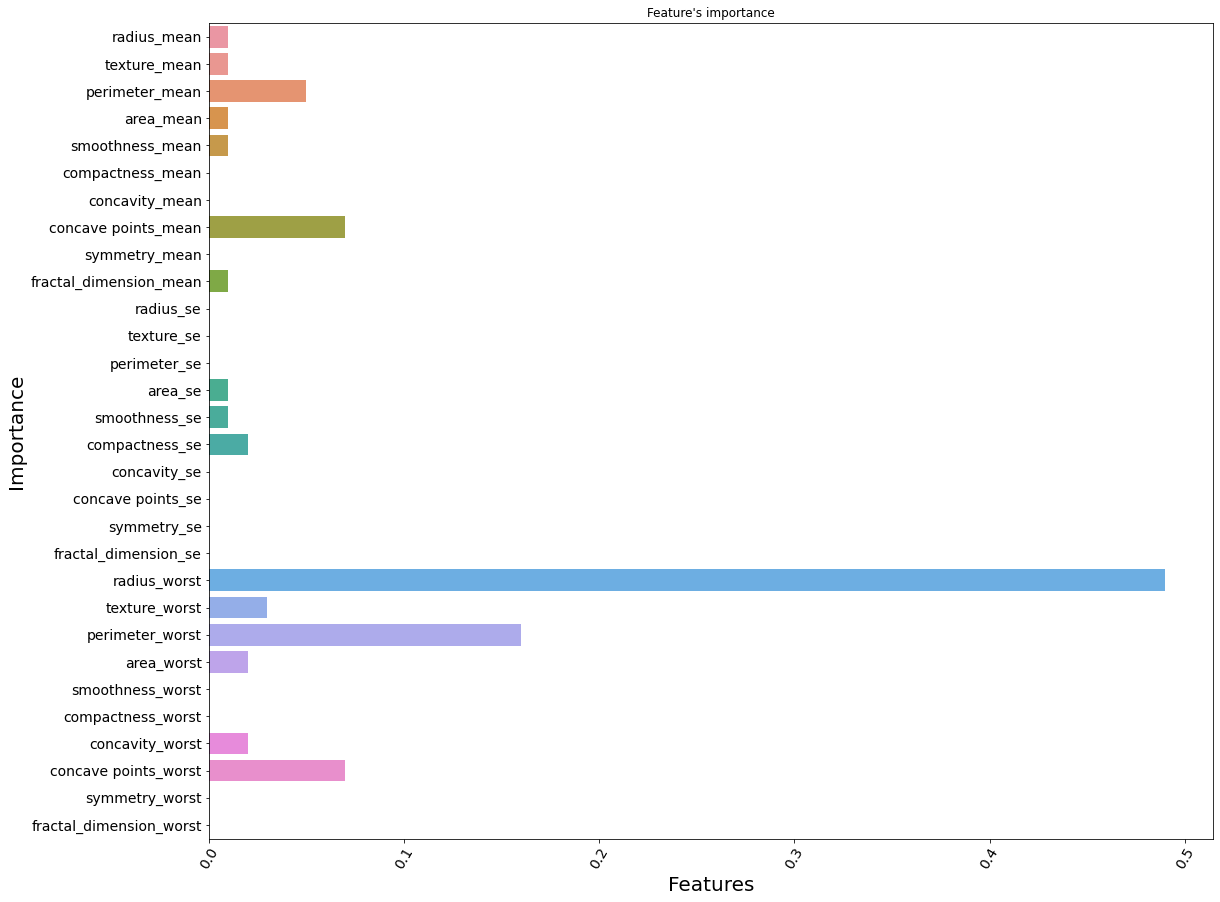

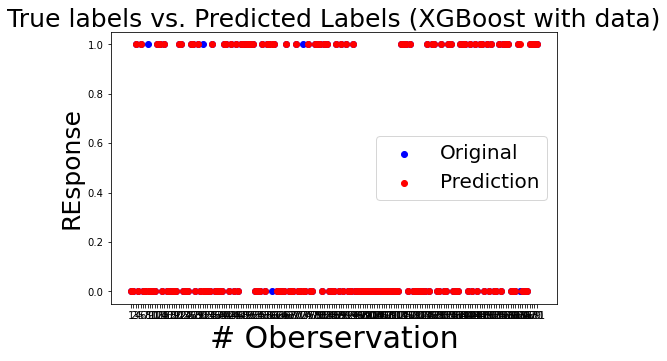

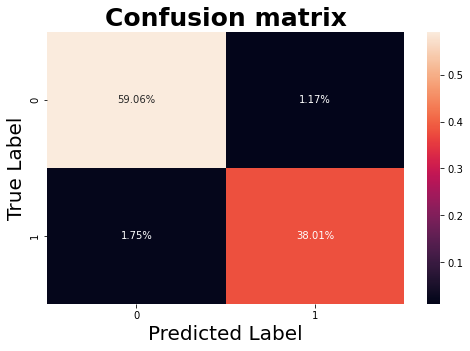

{'accuracy': 0.97, 'precision': 0.97, 'recall': 0.96, 'true_pos': 101, 'true_neg': 65, 'false_pos': 2, 'false_neg': 3}
{'radius_mean': 0.01, 'texture_mean': 0.01, 'perimeter_mean': 0.05, 'area_mean': 0.01, 'smoothness_mean': 0.01, 'compactness_mean': 0.0, 'concavity_mean': 0.0, 'concave points_mean': 0.07, 'symmetry_mean': 0.0, 'fractal_dimension_mean': 0.01, 'radius_se': 0.0, 'texture_se': 0.0, 'perimeter_se': 0.0, 'area_se': 0.01, 'smoothness_se': 0.01, 'compactness_se': 0.02, 'concavity_se': 0.0, 'concave points_se': 0.0, 'symmetry_se': 0.0, 'fractal_dimension_se': 0.0, 'radius_worst': 0.49, 'texture_worst': 0.03, 'perimeter_worst': 0.16, 'area_worst': 0.02, 'smoothness_worst': 0.0, 'compactness_worst': 0.0, 'concavity_worst': 0.02, 'concave points_worst': 0.07, 'symmetry_worst': 0.0, 'fractal_dimension_worst': 0.0}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


/home/etta/miniconda3/envs/py38/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'XGBoost with data_first_trial_Fri-Jul--1-13:37:24-2022'.
2022/07/01 13:37:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: XGBoost with data_first_trial_Fri-Jul--1-13:37:24-2022, version 1
Created version '1' of model 'XGBoost with data_first_trial_Fri-Jul--1-13:37:24-2022'.


Run - first_trial is logged to Experiment - XGBoost with data


{'accuracy': 0.97,
 'precision': 0.97,
 'recall': 0.96,
 'true_pos': 101,
 'true_neg': 65,
 'false_pos': 2,
 'false_neg': 3}

In [10]:
run_train_pipeline(model, x, y, 
                experiment_name='XGBoost with data',
                run_name='first_trial')